In [13]:
import os

import getpass
from pathlib import Path, PureWindowsPath # please check this medium article!! https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f



if getpass.getuser() == 'Konrad':
    project_dir = Path(PureWindowsPath('D:\\DeepLearningProject'))
elif getpass.getuser() == 'fruechtnicht':
    project_dir = Path('/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir')
else:
    raise ValueError('Check you own user name and add proper elif statement !!!')
# if you have a windows computer please specify your project path as Konrad, if not as fruechtnicht
os.chdir(project_dir/'log')

In [14]:
import pandas as pd 
import glob
import re
final = pd.DataFrame()
for file in glob.glob("*testing_ethnic_nr_of_channel_*"):
    seed = re.search("\d(?=(_training\.csv))", file).group(0)  
    value = re.search("\d*(?=(_\d*_training\.csv))", file).group(0)  
    variable = re.search("(?<=ethnic_).*(?=(_\d*_\d*_training\.csv))", file).group(0)  
    df = pd.read_csv(file)
    df[variable]= int(value)
    df['seed']= int(seed)
    final = pd.concat([final,df], axis=0)
    


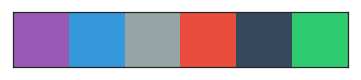

In [17]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

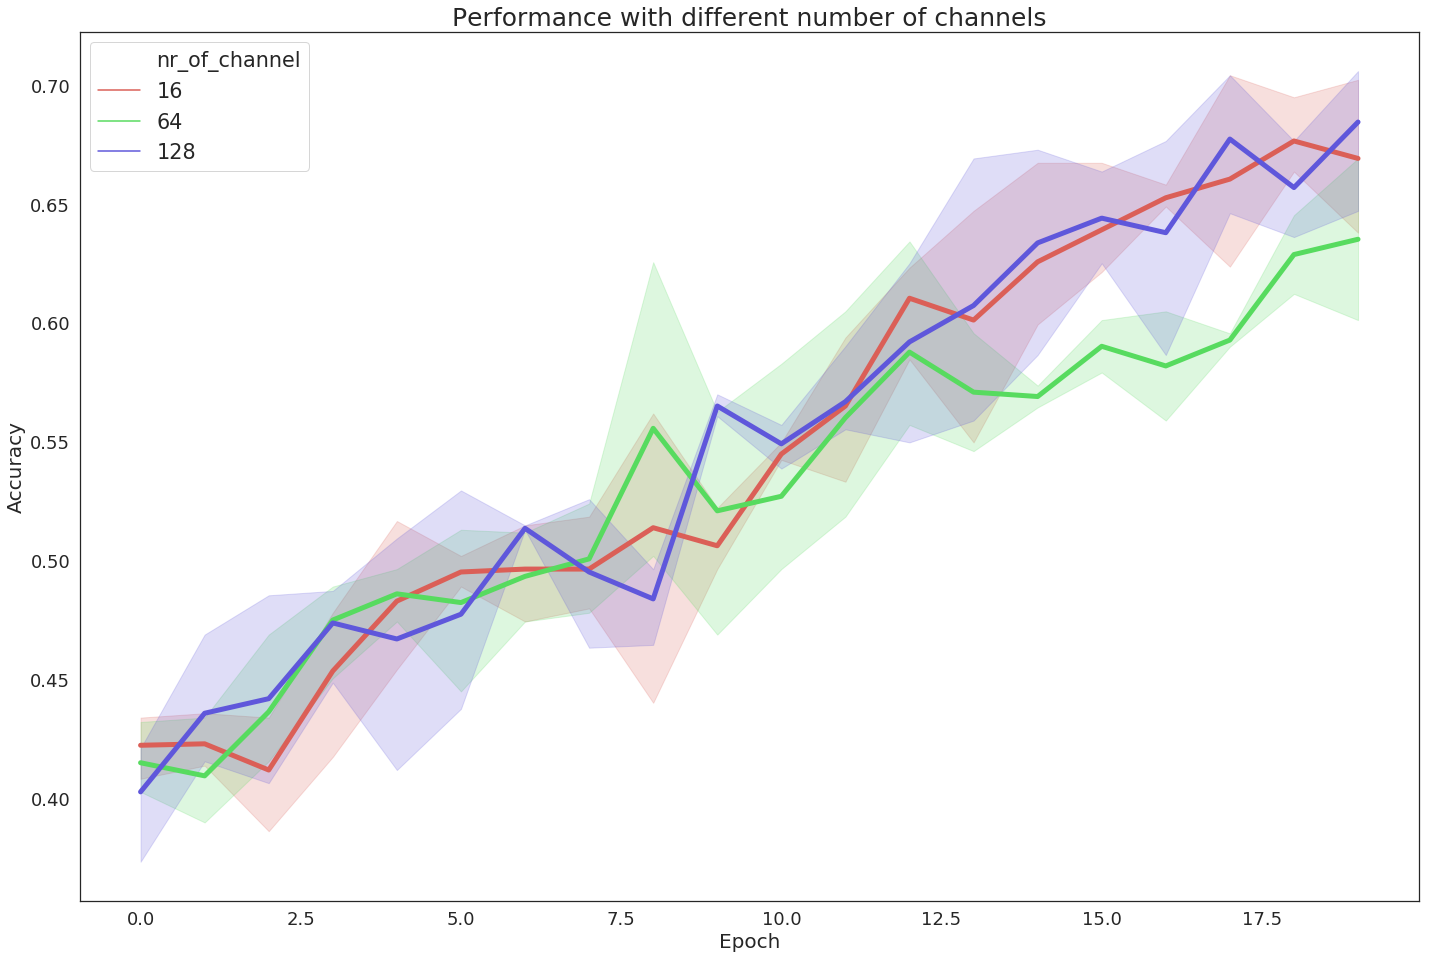

In [31]:

#final["Algorithem"] = final["2"]  + final["6"].map(str) + final["7"] + final["8"] + final["9"].map(str) + final["10"] + final["11"].map(str) + final["11"].map(str) + final["12"].map(str) + final["13"].map(str)

palette = sns.color_palette("hls",3)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(24,16)})
sns.set_style("white")
sns.set_palette("Reds")
ax = sns.lineplot(x="epoch", y="val_acc", data=final, hue="nr_of_channel", linewidth=5.0,legend="full", palette=palette)
ax.set_title('Performance with different number of channels', fontsize=25)
ax.legend(frameon=False, loc='lower center',ncol=2, fontsize=20)
ax.set_xlabel("Epoch",fontsize=20)
ax.set_ylabel("Accuracy",fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='best',fontsize='xx-large')
fig = ax.get_figure()




In [10]:
import pandas as pd 
import glob
import re
final = pd.DataFrame()
for file in glob.glob("*testing_ethnic_hidden_neurons_*"):
    seed = re.search("\d(?=(_training\.csv))", file).group(0)  
    value = re.search("\d*(?=(_\d*_training\.csv))", file).group(0)  
    variable = re.search("(?<=ethnic_).*(?=(_\d*_\d*_training\.csv))", file).group(0)  
    df = pd.read_csv(file)
    df[variable]= int(value)
    df['seed']= int(seed)
    final = pd.concat([final,df], axis=0)

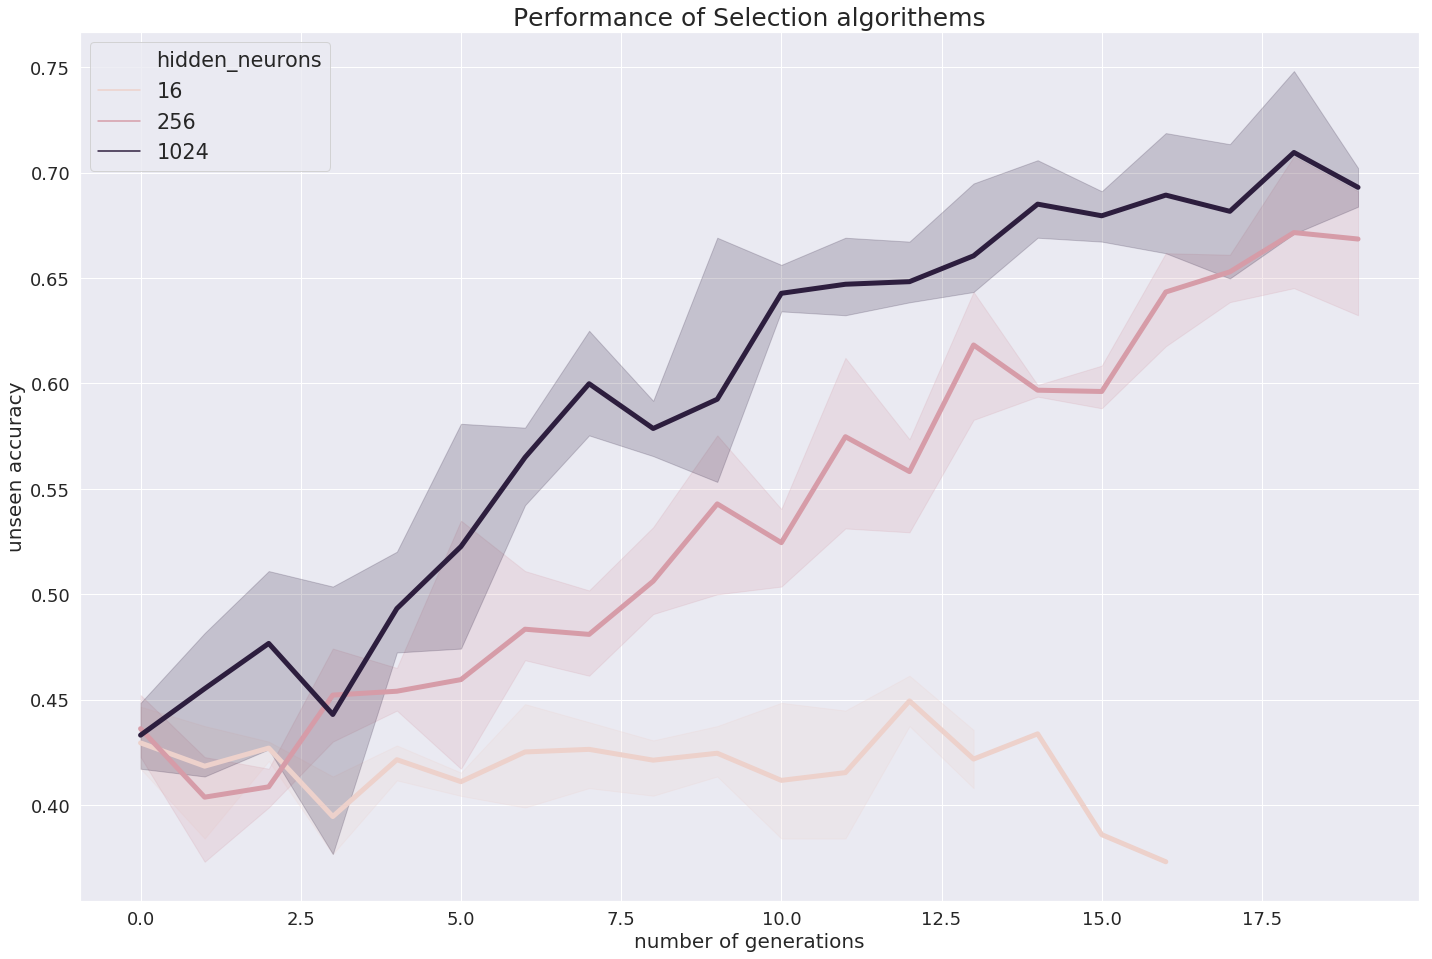

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(24,16)})
ax = sns.lineplot(x="epoch", y="val_acc", data=final, hue="hidden_neurons", linewidth=5.0,legend="full")
ax.set_title('Performance of Selection algorithems', fontsize=25)
ax.legend(frameon=False, loc='lower center',ncol=2, fontsize=20)
ax.set_xlabel("number of generations",fontsize=20)
ax.set_ylabel("unseen accuracy",fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='best',fontsize='xx-large')
fig = ax.get_figure()

